# Done using decision tree classifier

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

 Keep trying       1.00      1.00      1.00        30
     Solved!       1.00      1.00      1.00        11

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



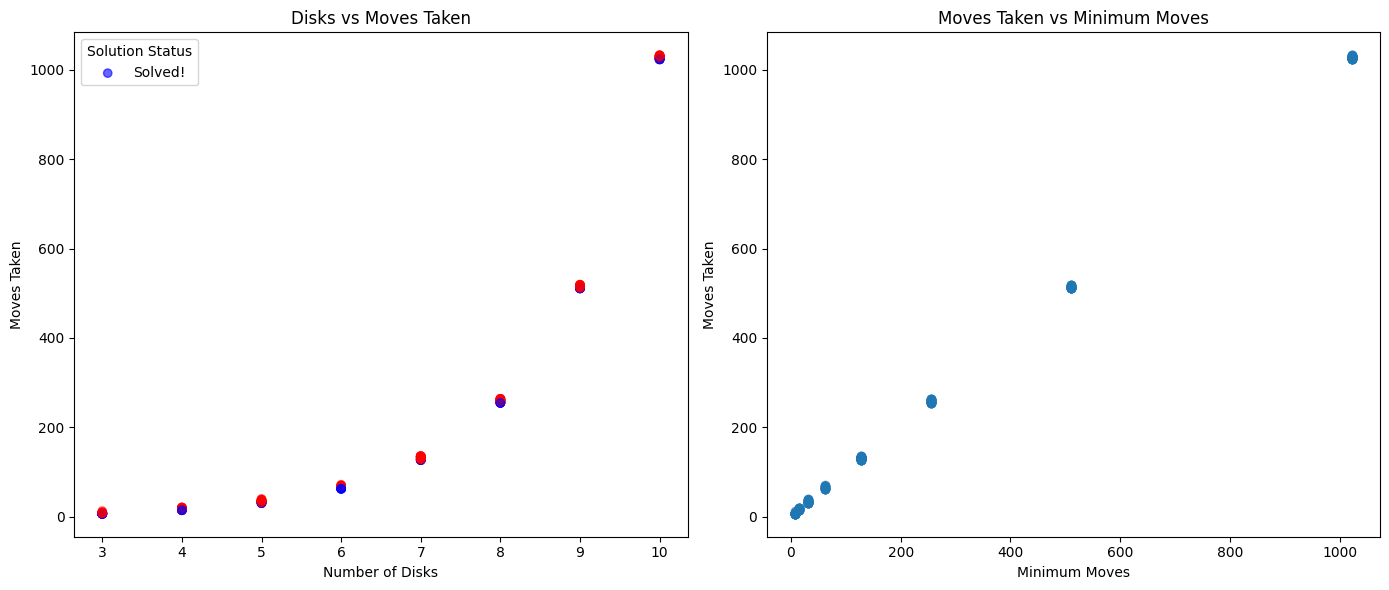

Next 10 Predictions (Last 10 Rows):
 Disks  Moves Taken Predicted Solution Status
     4           15                   Solved!
     9          512               Keep trying
     7          135               Keep trying
     7          129               Keep trying
    10         1030               Keep trying
     4           16               Keep trying
     6           63                   Solved!
     4           15                   Solved!
     7          134               Keep trying
     3            8               Keep trying


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


file_path = "C:/Users/ashwi/Desktop/VIII SEM Project/Phase-2/Review-2/ML Models/Hanoi_data.csv"
data = pd.read_csv(file_path)


def generate_hanoi_data(num_samples=100, max_disks=10):
    new_data = []
    for _ in range(num_samples):
        disks = np.random.randint(3, max_disks + 1)
        min_moves = 2**disks - 1
        moves_taken = min_moves + np.random.randint(-1, min(10, min_moves // 2))
        moves_taken = max(moves_taken, min_moves)
        solution_status = "Solved!" if moves_taken == min_moves else "Keep trying"
        timestamp = pd.Timestamp.now()
        new_data.append([timestamp, disks, moves_taken, min_moves, solution_status])
    return pd.DataFrame(new_data, columns=["Timestamp", "Disks", "Moves Taken", "Minimum Moves", "Solution Status"])


additional_data = generate_hanoi_data()
augmented_data = pd.concat([data, additional_data], ignore_index=True)


X = augmented_data[["Disks", "Moves Taken"]]
y = augmented_data["Solution Status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
colors = augmented_data["Solution Status"].map({"Solved!": "blue", "Keep trying": "red"})
plt.scatter(augmented_data["Disks"], augmented_data["Moves Taken"], c=colors, alpha=0.6)
plt.title("Disks vs Moves Taken")
plt.xlabel("Number of Disks")
plt.ylabel("Moves Taken")
plt.legend(["Solved!", "Keep trying"], loc="upper left", title="Solution Status")


plt.subplot(1, 2, 2)
plt.plot(augmented_data["Minimum Moves"], augmented_data["Moves Taken"], 'o', alpha=0.6)
plt.title("Moves Taken vs Minimum Moves")
plt.xlabel("Minimum Moves")
plt.ylabel("Moves Taken")

plt.tight_layout()
plt.show()


def predict_last_10_rows():

    last_10_rows = augmented_data.tail(10)[["Disks", "Moves Taken"]]
    predictions = model.predict(last_10_rows)
    last_10_rows["Predicted Solution Status"] = predictions
    return last_10_rows.reset_index(drop=True)  

next_10_predictions = predict_last_10_rows()
print("Next 10 Predictions (Last 10 Rows):")
print(next_10_predictions.to_string(index=False))


# Done using SVM

Accuracy: 0.46
Classification Report:
              precision    recall  f1-score   support

 Keep trying       0.67      0.48      0.56        29
     Solved!       0.25      0.42      0.31        12

    accuracy                           0.46        41
   macro avg       0.46      0.45      0.44        41
weighted avg       0.54      0.46      0.49        41



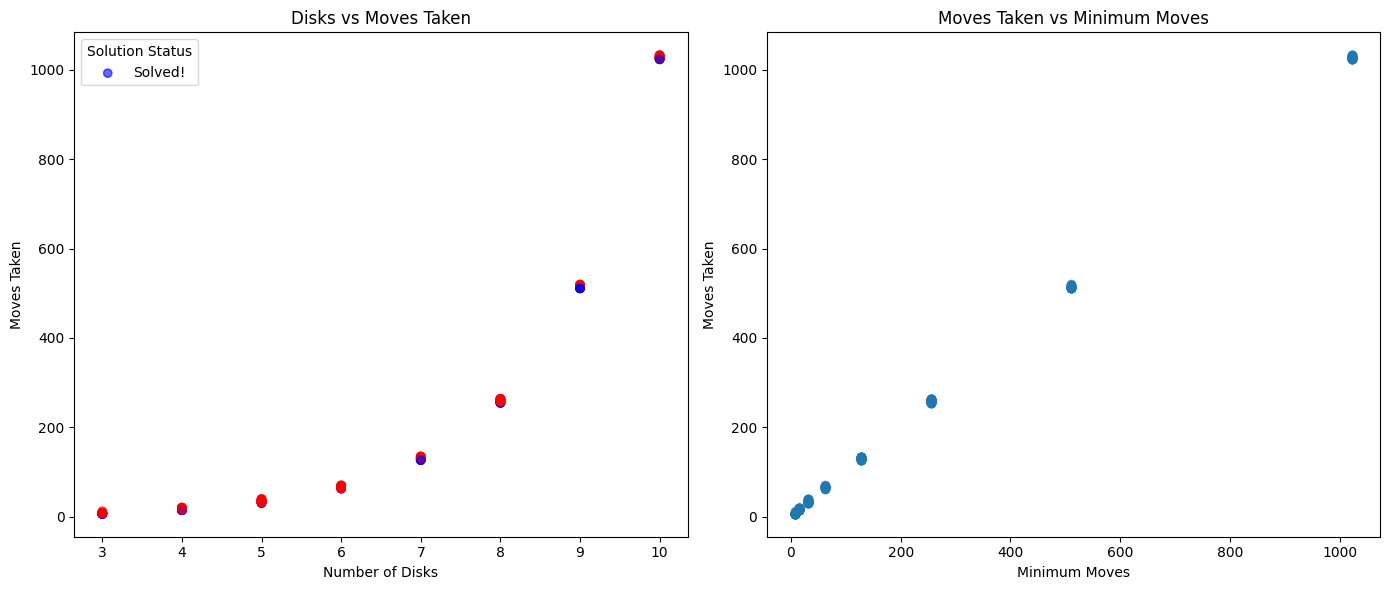

Next 10 Predictions (Last 10 Rows):
 Disks  Moves Taken Predicted Solution Status
     9          511                   Solved!
     8          260               Keep trying
     7          132               Keep trying
     8          258               Keep trying
     7          135               Keep trying
     3            8                   Solved!
     7          127               Keep trying
     5           32                   Solved!
     5           32                   Solved!
     5           33                   Solved!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


file_path = "C:/Users/ashwi/Downloads/Hanoi_data.csv"
data = pd.read_csv(file_path)


def generate_hanoi_data(num_samples=100, max_disks=10):
    new_data = []
    for _ in range(num_samples):
        disks = np.random.randint(3, max_disks + 1)
        min_moves = 2**disks - 1
        moves_taken = min_moves + np.random.randint(-1, min(10, min_moves // 2))
        moves_taken = max(moves_taken, min_moves)
        solution_status = "Solved!" if moves_taken == min_moves else "Keep trying"
        timestamp = pd.Timestamp.now()
        new_data.append([timestamp, disks, moves_taken, min_moves, solution_status])
    return pd.DataFrame(new_data, columns=["Timestamp", "Disks", "Moves Taken", "Minimum Moves", "Solution Status"])


additional_data = generate_hanoi_data()
augmented_data = pd.concat([data, additional_data], ignore_index=True)


X = augmented_data[["Disks", "Moves Taken"]]
y = augmented_data["Solution Status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
colors = augmented_data["Solution Status"].map({"Solved!": "blue", "Keep trying": "red"})
plt.scatter(augmented_data["Disks"], augmented_data["Moves Taken"], c=colors, alpha=0.6)
plt.title("Disks vs Moves Taken")
plt.xlabel("Number of Disks")
plt.ylabel("Moves Taken")
plt.legend(["Solved!", "Keep trying"], loc="upper left", title="Solution Status")


plt.subplot(1, 2, 2)
plt.plot(augmented_data["Minimum Moves"], augmented_data["Moves Taken"], 'o', alpha=0.6)
plt.title("Moves Taken vs Minimum Moves")
plt.xlabel("Minimum Moves")
plt.ylabel("Moves Taken")

plt.tight_layout()
plt.show()


def predict_last_10_rows():
    
    last_10_rows = augmented_data.tail(10)[["Disks", "Moves Taken"]]
    predictions = model.predict(last_10_rows)
    last_10_rows["Predicted Solution Status"] = predictions
    return last_10_rows.reset_index(drop=True)  


next_10_predictions = predict_last_10_rows()
print("Next 10 Predictions (Last 10 Rows):")
print(next_10_predictions.to_string(index=False))

